In [1]:
from eleanor.source import Source
from eleanor.targetdata import TargetData
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from lightkurve.correctors import SFFCorrector
from lightkurve.lightcurve import LightCurve as lc

In [2]:
"""
cen_tic  = 38843180
cen_star = Source(tic=cen_tic, sector=1)
cen_data = TargetData(cen_star)

c1_tic  = 358578691
c1_star = Source(tic=c1_tic, sector=1)
c1_data = TargetData(c1_star)

c2_tic  = 38762664
c2_star = Source(tic=c2_tic, sector=1)
c2_data = TargetData(c2_star)

c3_tic  = 25080787
c3_star = Source(tic=c3_tic, sector=1)
c3_data = TargetData(c3_star)
"""
c4_tic  = 389865900
c4_star = Source(tic=c4_tic, sector=1)
c4_data = TargetData(c4_star, height=13, width=13)

In [3]:
print(cen_star.postcard, c1_star.postcard, c2_star.postcard, c3_star.postcard, c4_star.postcard)

NameError: name 'cen_star' is not defined

In [4]:
plt.figure(figsize=(8,5))
plt.plot(cen_data.time, cen_data.centroid_xs-np.nanmedian(cen_data.centroid_xs), 'r.')
plt.plot(c1_data.time , c1_data.centroid_xs -np.nanmedian(c1_data.centroid_xs), 'k.')
plt.plot(c2_data.time , c2_data.centroid_xs -np.nanmedian(c2_data.centroid_xs), 'b.')
#plt.plot(c3_data.time , c3_data.x_com -np.nanmedian(c3_data.x_com), 'g.')
plt.plot(c4_data.time , c4_data.centroid_xs -np.nanmedian(c4_data.centroid_xs), 'y.')
plt.show()

NameError: name 'cen_data' is not defined

<Figure size 576x360 with 0 Axes>

In [5]:
plt.figure(figsize=(8,5))
plt.plot(cen_data.time, cen_data.centroid_ys-np.nanmedian(cen_data.centroid_ys), 'r.')
plt.plot(c1_data.time , c1_data.centroid_ys -np.nanmedian(c1_data.centroid_ys), 'k.')
plt.plot(c2_data.time , c2_data.centroid_ys -np.nanmedian(c2_data.centroid_ys), 'b.')
#plt.plot(c3_data.time , c3_data.x_com -np.nanmedian(c3_data.x_com), 'g.')
plt.plot(c4_data.time , c4_data.centroid_ys -np.nanmedian(c4_data.centroid_ys), 'y.')
plt.show()

NameError: name 'cen_data' is not defined

<Figure size 576x360 with 0 Axes>

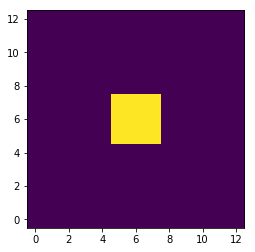

In [6]:
plt.imshow(c4_data.aperture, origin='lower')
plt.show()

In [7]:
#plt.figure(figsize=(30,30))
#for i in range(9):
#    for j in range(9):
#        ax = plt.subplot(9,9,9*i+j+1)
plt.plot(c3_data.time[c3_data.quality==0], c3_data.tpf[:,5,5][c3_data.quality==0], '.')
plt.show()

NameError: name 'c3_data' is not defined

In [8]:
pm = np.loadtxt('https://archipelago.uchicago.edu/tess_postcards/pointingModel_1_4-1.txt', skiprows=1)

In [9]:
plt.scatter(cen_data.centroid_xs, cen_data.centroid_ys, s=4, c=cen_data.raw_flux)
plt.colorbar(label='BJD Time')
plt.xlabel('$\Delta$x')
plt.ylabel('$\Delta$y')
plt.show()

NameError: name 'cen_data' is not defined

In [10]:
def find_break(t):
    t   = np.diff(t)
    ind = np.where( t > np.mean(t)+2*np.std(t))[0][0]
    return ind

In [11]:
brk = find_break(c4_data.time)
brk += 1

r1 = np.arange(0, brk, 1)
r2 = np.arange(brk,len(c4_data.time))

q1 = c4_data.quality[r1] == 0
q2 = c4_data.quality[r2] == 0

t1 = c4_data.time[r1]; f1 = c4_data.raw_flux[r1]
t2 = c4_data.time[r2]; f2 = c4_data.raw_flux[r2]

sff = SFFCorrector()
corr_lc_obj = sff.correct(time=t1, flux=f1, 
                          centroid_col=c4_data.centroid_xs[r1], 
                          centroid_row=c4_data.centroid_ys[r1],
                         windows=1, polyorder=2, niters=3, sigma_1=3, sigma_2=5,
                         restore_trend=False, bins=15)

9.083


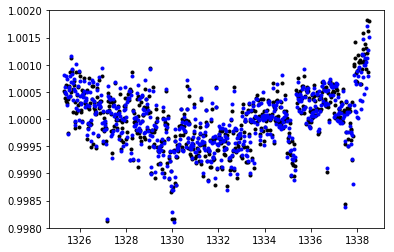

In [12]:
#print(np.std(corr_lc_obj.flux[q1]), np.std(cen_data.raw_flux[r1][q1]/np.nanmedian(c4_data.raw_flux[r1][q1])))
print(c4_star.tess_mag)
plt.plot(c4_data.time[r1][q1], c4_data.raw_flux[r1][q1]/np.nanmedian(c4_data.raw_flux[r1][q1]), 'k.')

plt.plot(c4_data.time[r1][q1], c4_data.corr_flux[r1][q1]/np.nanmedian(c4_data.corr_flux[r1][q1]), 'b.')
plt.ylim(0.998,1.002)
plt.show()


In [13]:
c4_data.save()

ValueError: Illegal format `object`.

In [ ]:
np.std(c4_data.corr_flux[r1][q1]/np.nanmedian(c4_data.corr_flux[r1][q1]))/np.sqrt(2)*1e6

In [ ]:
lc(time=c4_data.time[r1][q1], flux=c4_data.corr_flux[r1][q1]).estimate_cdpp(transit_duration=2)